<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/Assignment2/HW2_with_k_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 data set

## Loading the CIFAR10 data set

In [0]:
import keras 
import numpy as np
from random import seed
from random import randrange
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 46s 0us/step


## Preprocessing

In [0]:
# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

In [0]:
#split into validation set and training set at the rate of 8:2
i = 40000
training_images = train_images[:i]
valid_images = train_images[:-i]
training_labels = train_labels[:i]
valid_labels = train_labels[:-i]

In [0]:
print(training_images.shape)
print(training_labels.shape)
print(valid_images.shape)
print(valid_labels.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
# training_images = np.array(training_images)
# training_labels = np.array(training_labels)
# valid_images = np.array(valid_images)
# valid_labels = np.array(valid_labels)

#compare with K fold

In [0]:
def k_fold_cross_split(data,folds):
  new_data = list(data)
  fold_size = int(data.shape[0]/folds)
  dataset_split = []
  for i in range(folds):
    fold = []
    for j in range(fold_size):
      index = randrange(len(new_data))
      fold.append(new_data.pop(index))
    dataset_split.append(fold)
  return dataset_split
#split train into training and validation
seed(1)
num_folds = 5
training_images = []
training_labels = []
folds_all = k_fold_cross_split(train_images, num_folds)
folds_all_label = k_fold_cross_split(train_labels,num_folds)
folds_all = np.array(folds_all)
folds_all_label = np.array(folds_all_label)

In [0]:
training_images = np.concatenate((folds_all[0],folds_all[1],folds_all[2],folds_all[3]))
training_labels = np.concatenate((folds_all_label[0],folds_all_label[1],folds_all_label[2],folds_all_label[3]))
valid_images = folds_all[num_folds-1]
valid_labels = folds_all_label[num_folds-1]

In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images[0].shape))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 10
history = network.fit(training_images, 
                      training_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(valid_images, valid_labels))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               16777728  
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)  

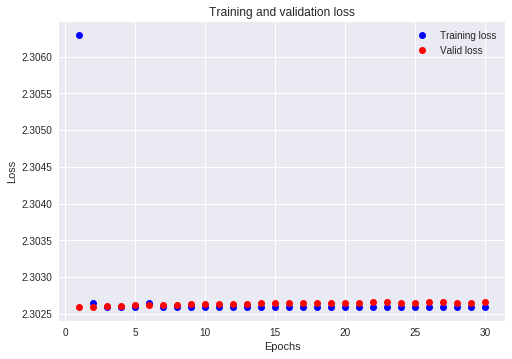

In [0]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

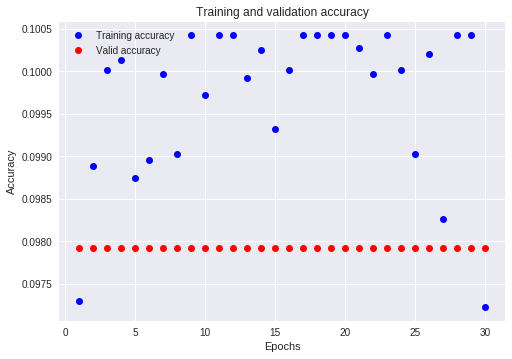

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
ynew = network.predict_classes(test_images)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (test_labels[0], ynew[0]))

In [0]:
scores = network.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 157us/step
Test loss: 2.3025914894104003
Test accuracy: 0.1
